# OSRM areas

## Installation

From GitHub

```
pip install git+https://github.com/alexanderquispe/osrm_python
```
Specific branch 

```
pip install git+https://github.com/alexanderquispe/osrm_python@{branch}
```

## Download `PBF` files from [geofabrik](https://download.geofabrik.de/)

In [1]:
from osrmareas.downloader import GetPBF
download = GetPBF()

Convert the country names to lowercase and replace spaces with dashes (-).
source: https://download.geofabrik.de/


In [2]:
import os
def dir_tree(path):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        sub_indent = ' ' * 4 * (level + 1)
        for file in files:
            print('{}{}'.format(sub_indent, file))

We can download files using the methods `GetPBF.country([where], continent=None).get()` for countries and `GetPBF.sub_region([where], continent=None, country=None).get()` for sub-regions within some countries.

The database can be called as follows:

```py
import osrmareas.downloader as dwnl
dwnl.cnt # continent
dnwl.cntry # continent, countries
dnwl.region # continent, countries, regions
```

For file downloads, you can specify the name of the folder (if it does not exist, it will be created) where the file(s) will be downloaded. If a file with the same name already exists, it will skip the download. You can force the download with the `get(force_download=True)` parameter.

In [3]:
download.country(['peru', 'pakistan']).get(save_dir='country_pbf')
dir_tree("country_pbf")

country_pbf/
    pakistan-latest.osm.pbf
    peru-latest.osm.pbf


In [4]:
download.sub_region(['alberta']).get(save_dir='sub_region_pbf')
# download.sub_region(['alberta'], country=["canada"], continent=["north-america"])

## Local OSRM Configuration

For the local OSRM configuration, there are several steps involved.

- Download the binary files and save them in a specific folder (recommended: `C:\osrm`).
- Import the server module.
  1. Generate the OSRM file.
  2. Prepare the server.
  3. Run OSRM locally.

In [5]:
from osrmareas.osrm import Server
cnd_alb = Server("alberta-latest.osm", "sub_region_pbf")

Both `gen_osrm_1()` and `prepare_server_2()` functions can consume up to 100% of the CPU.

In [6]:
cnd_alb.gen_osrm_1()
cnd_alb.prepare_server_2()

Please run the following function only once for each .pbf file. (It takes some time to execute, and consume all the CPU)
Found sub_region_pbf\alberta-latest.osrm file
Done, generate a osrm file
Please run the following function only once for each .pbf file. (It takes some time to execute, and consume all the CPU)
Done, I have generated the local OSRM server with `{server}.run_server()`.


After preparing the server, there will be new files generated.

In [7]:
dir_tree('sub_region_pbf')

sub_region_pbf/
    alberta-latest.osm.pbf
    alberta-latest.osrm
    alberta-latest.osrm.cnbg
    alberta-latest.osrm.cnbg_to_ebg
    alberta-latest.osrm.datasource_names
    alberta-latest.osrm.ebg
    alberta-latest.osrm.ebg_nodes
    alberta-latest.osrm.edges
    alberta-latest.osrm.enw
    alberta-latest.osrm.fileIndex
    alberta-latest.osrm.geometry
    alberta-latest.osrm.hsgr
    alberta-latest.osrm.icd
    alberta-latest.osrm.names
    alberta-latest.osrm.nbg_nodes
    alberta-latest.osrm.properties
    alberta-latest.osrm.ramIndex
    alberta-latest.osrm.restrictions
    alberta-latest.osrm.timestamp
    alberta-latest.osrm.tld
    alberta-latest.osrm.tls
    alberta-latest.osrm.turn_duration_penalties
    alberta-latest.osrm.turn_penalties_index
    alberta-latest.osrm.turn_weight_penalties


We can start the server as follows:

In [8]:
cnd_alb.run_server()

The server is running in the background, you can start making queries.


We can make route queries using `areas.get_osrm_routes(from, to)`.

Describe el código en inglés

In [9]:
from osrmareas import areas
from_ = [53.550905, -113.268436]
to_ = [53.548449, -113.258648]
rt = areas.get_osrm_route(from_, to_)
rt

c:\Users\Jhon\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


,geometry,dist_km,x,y,x_begin,y_begin
0,"LINESTRING (-113.26850 53.55087, -113.26895 53...",1.2714,53.548449,-113.258648,53.550905,-113.268436


<Axes: >

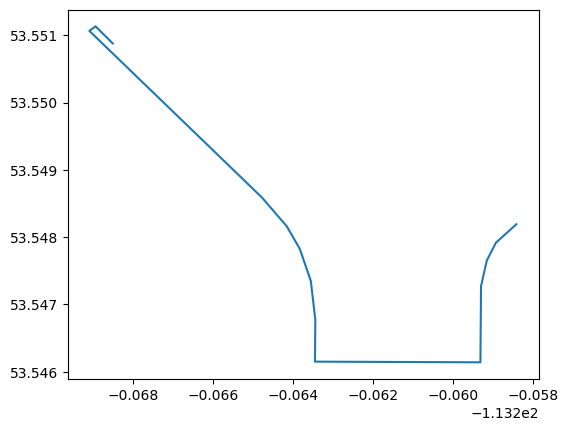

In [10]:
rt.plot()

the [Google Maps route](https://www.google.com/maps/dir/53.550905,+-113.268436/53.548449,+-113.258648/@53.5489972,-113.2648387,17z/data=!4m10!4m9!1m3!2m2!1d-113.268436!2d53.550905!1m3!2m2!1d-113.258648!2d53.548449!3e0?entry=ttu)


We can also obtain all routes within a default radius (in kilometers).

In [11]:
all_rt=areas.get_routes(from_, 5)
all_rt

,geometry,dist_km,x,y,x_begin,y_begin
0,"LINESTRING (-113.26850 53.55087, -113.26895 53...",5.0417,53.526882,-113.308860,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.26895 53...",5.0352,53.532221,-113.308860,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.26895 53...",4.5280,53.537560,-113.308860,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.26895 53...",3.9101,53.542899,-113.308860,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.27509 53...",4.1813,53.548236,-113.308860,53.550905,-113.268436
...,...,...,...,...,...,...
0,"LINESTRING (-113.26850 53.55087, -113.26910 53...",5.4344,53.553573,-113.228012,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.27509 53...",6.7640,53.558910,-113.228012,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.27509 53...",6.1856,53.564245,-113.228012,53.550905,-113.268436
0,"LINESTRING (-113.26850 53.55087, -113.27509 53...",6.0089,53.569580,-113.228012,53.550905,-113.268436


<Axes: >

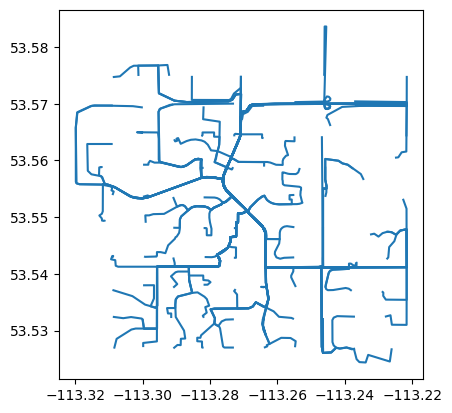

In [12]:
all_rt.plot()

Finally, we can see a difference between the radius we defined in the area radius parameter. Some points are above 5km radius. We can filter and obtain the area of the extreme points using `areas.get_ameba()`.

In [13]:
ameba = areas.get_ameba(all_rt, max_km = 5, alpha = 80)

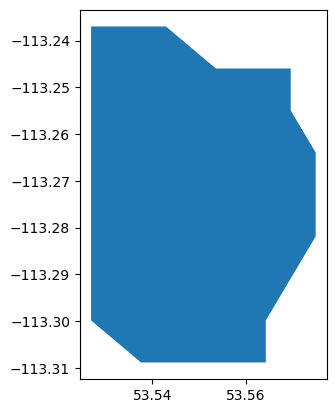

In [14]:
ameba.crs = None
ameba.plot()
ameba = ameba.set_crs(4326)